# Exploración de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

## Cargar los datos

In [2]:
path = r"../data/raw/consumo_casa.csv"

In [3]:
df_desagregado = pd.read_csv(path).drop("Unnamed: 0", axis=1)
df_desagregado.head()

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
0,2017-06-07 0:00,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1
1,2017-06-07 0:01,231.814,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1
2,2017-06-07 0:02,230.971,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0
3,2017-06-07 0:03,231.878,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0
4,2017-06-07 0:04,189.225,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1


In [4]:
# profile = ProfileReport(df_desagregado)
# profile

In [5]:
# profile.to_file("../reports/report")

## Exploración del DataFrame

In [54]:
df_desagregado.shape

(194123, 17)

In [6]:
df_desagregado.describe()

,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
count,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000
mean,284.337465,57.508366,4.234783,4.541936,1.335831,5.688060,0.945553,9.977765,3.559746
std,355.066930,71.010637,26.762249,61.315247,5.846712,88.430616,1.452993,22.978044,2.266801
min,30.658000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.915000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000
50%,175.799000,1.200000,0.700000,0.200000,0.200000,0.200000,0.200000,0.200000,4.500000
75%,242.910000,131.400000,1.300000,0.600000,1.000000,1.000000,1.100000,1.100000,5.400000
max,1992.216000,843.800000,547.800000,1120.900000,62.300000,1682.700000,70.900000,647.000000,73.600000


In [7]:
df_desagregado.dtypes

Fecha              object
Medidor [W]       float64
Refrigerator      float64
Clothes washer    float64
Clothes Iron      float64
Computer          float64
Oven              float64
Play              float64
TV                float64
Sound system      float64
dtype: object

In [8]:
df_desagregado["Fecha"] = pd.to_datetime(df_desagregado["Fecha"])
df_desagregado.dtypes

Fecha             datetime64[ns]
Medidor [W]              float64
Refrigerator             float64
Clothes washer           float64
Clothes Iron             float64
Computer                 float64
Oven                     float64
Play                     float64
TV                       float64
Sound system             float64
dtype: object

In [9]:
df_desagregado.isnull().value_counts()

Fecha  Medidor [W]  Refrigerator  Clothes washer  Clothes Iron  Computer  Oven   Play   TV     Sound system
False  False        False         False           False         False     False  False  False  False           194123
Name: count, dtype: int64

In [10]:
df_desagregado["Fecha"].dt.year.unique()

array([2017])

In [30]:
df_desagregado["Month"] = df_desagregado["Fecha"].dt.month.astype("object")
df_desagregado["Day"] = df_desagregado["Fecha"].dt.day.astype("object")
df_desagregado["Hour"] = df_desagregado["Fecha"].dt.hour.astype("object")
df_desagregado["Minutes"] = df_desagregado["Fecha"].dt.minute.astype("object")
df_desagregado["Date"] = pd.to_datetime(df_desagregado["Fecha"].dt.date)
df_desagregado["WeekDay"] = df_desagregado["Fecha"].dt.day_name()
df_desagregado["WeekDayNumber"] = df_desagregado["Fecha"].dt.day_of_week.astype("object")
df_desagregado

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system,Month,Day,Hour,Minutes,Date,WeekDay,WeekDayNumber
0,2017-06-07 00:00:00,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1,6,7,0,0,2017-06-07,Wednesday,2
1,2017-06-07 00:01:00,231.814,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1,6,7,0,1,2017-06-07,Wednesday,2
2,2017-06-07 00:02:00,230.971,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0,6,7,0,2,2017-06-07,Wednesday,2
3,2017-06-07 00:03:00,231.878,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0,6,7,0,3,2017-06-07,Wednesday,2
4,2017-06-07 00:04:00,189.225,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1,6,7,0,4,2017-06-07,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194118,2017-10-22 23:55:00,88.272,0.1,1.4,0.0,0.0,0.8,0.4,0.2,0.4,10,22,23,55,2017-10-22,Sunday,6
194119,2017-10-22 23:56:00,86.386,1.0,1.3,0.1,0.0,1.0,1.3,1.0,0.6,10,22,23,56,2017-10-22,Sunday,6
194120,2017-10-22 23:57:00,85.766,0.0,1.8,0.1,0.0,0.1,0.1,1.0,0.6,10,22,23,57,2017-10-22,Sunday,6
194121,2017-10-22 23:58:00,87.665,0.4,0.0,0.1,0.0,0.4,0.1,1.1,1.0,10,22,23,58,2017-10-22,Sunday,6


## Creando Matriz de uso de cargas

In [31]:
df_cargas = df_desagregado.copy()

In [32]:
for columna in df_cargas.drop(["Fecha", "Medidor [W]", "Month", "Day", "Hour", "Minutes", "Date"], axis=1):
    df_cargas[columna] = df_cargas[columna].apply(lambda x: 1 if x != 0 else 0)
    df_cargas[columna] = df_cargas[columna].astype("object")

In [33]:
df_cargas.dtypes

Fecha             datetime64[ns]
Medidor [W]              float64
Refrigerator              object
Clothes washer            object
Clothes Iron              object
Computer                  object
Oven                      object
Play                      object
TV                        object
Sound system              object
Month                     object
Day                       object
Hour                      object
Minutes                   object
Date              datetime64[ns]
WeekDay                   object
WeekDayNumber             object
dtype: object

In [34]:
df_cargas.head()

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system,Month,Day,Hour,Minutes,Date,WeekDay,WeekDayNumber
0,2017-06-07 00:00:00,228.887,1,1,0,1,1,0,0,1,6,7,0,0,2017-06-07,1,1
1,2017-06-07 00:01:00,231.814,1,1,0,1,1,0,0,1,6,7,0,1,2017-06-07,1,1
2,2017-06-07 00:02:00,230.971,1,1,0,1,0,0,0,1,6,7,0,2,2017-06-07,1,1
3,2017-06-07 00:03:00,231.878,1,0,1,1,0,1,1,1,6,7,0,3,2017-06-07,1,1
4,2017-06-07 00:04:00,189.225,0,1,0,0,1,0,1,1,6,7,0,4,2017-06-07,1,1


<Axes: >

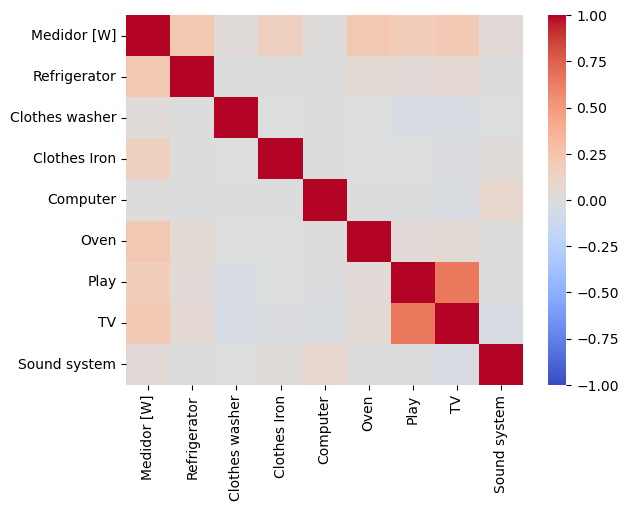

In [35]:
sns.heatmap(df_desagregado.corr(numeric_only=True), cmap="coolwarm", vmin=-1)

## Visualizando series de tiempo

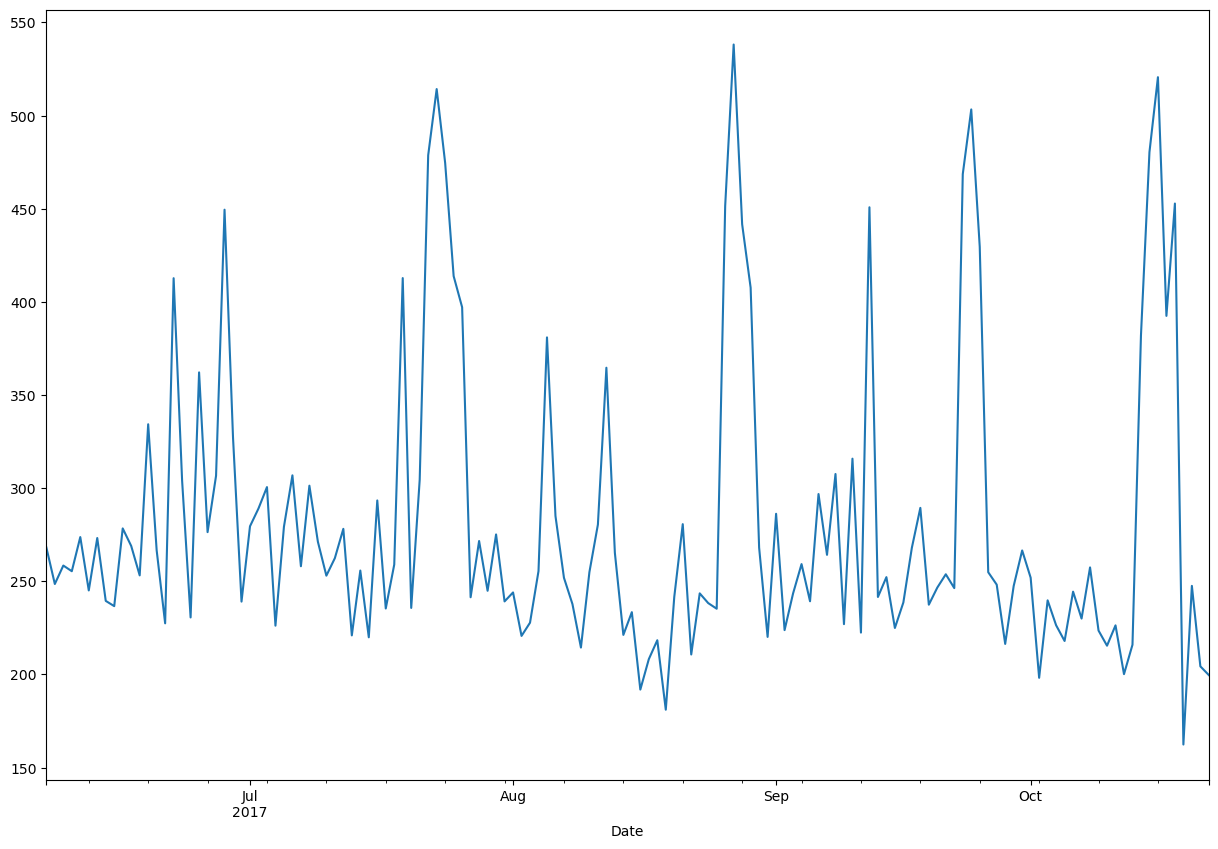

In [36]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Date")["Medidor [W]"].mean().plot()
plt.show()

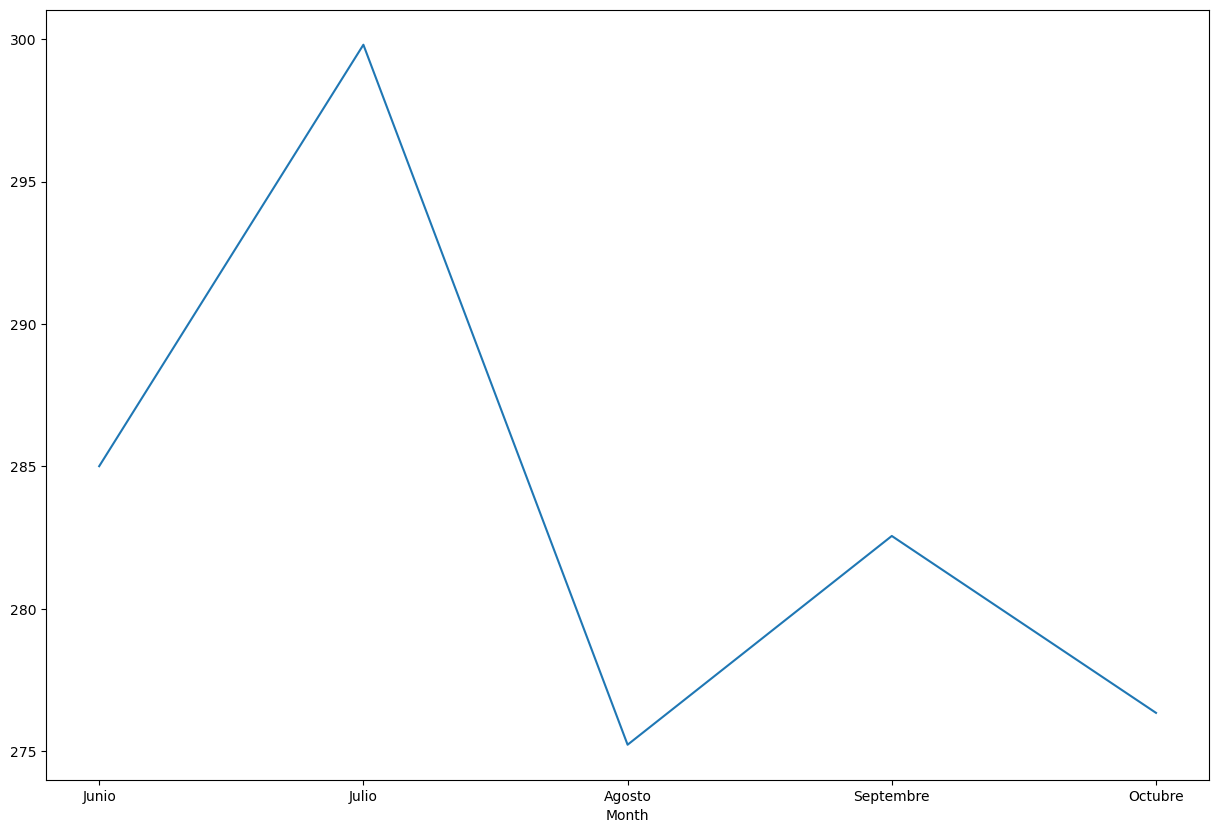

In [37]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Month")["Medidor [W]"].mean().plot()
plt.xticks(range(len(df_desagregado.groupby("Month")["Medidor [W]"].mean().index) + 1, 11), ["Junio", "Julio", "Agosto", "Septembre", "Octubre"])
plt.show()

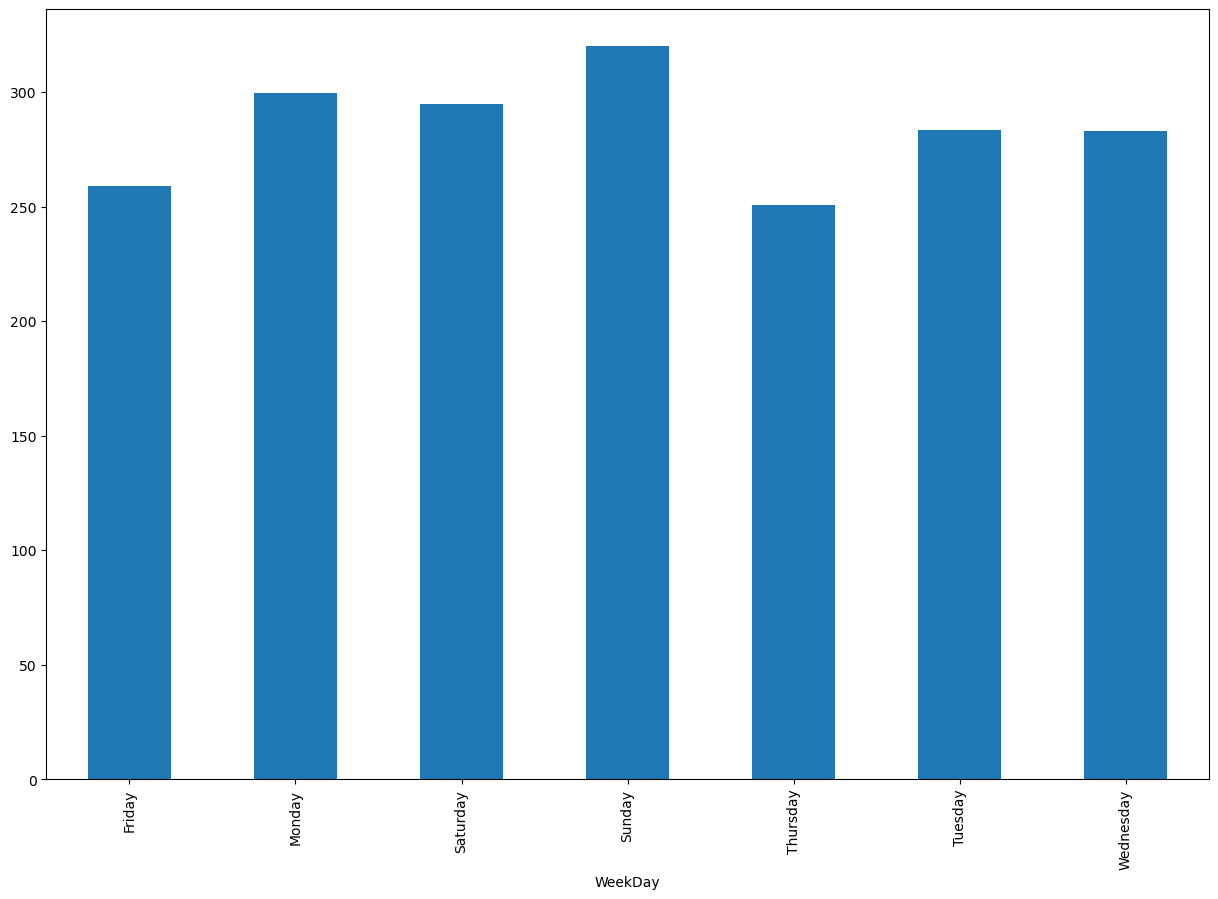

In [38]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("WeekDay")["Medidor [W]"].mean().plot(kind="bar")
plt.show()

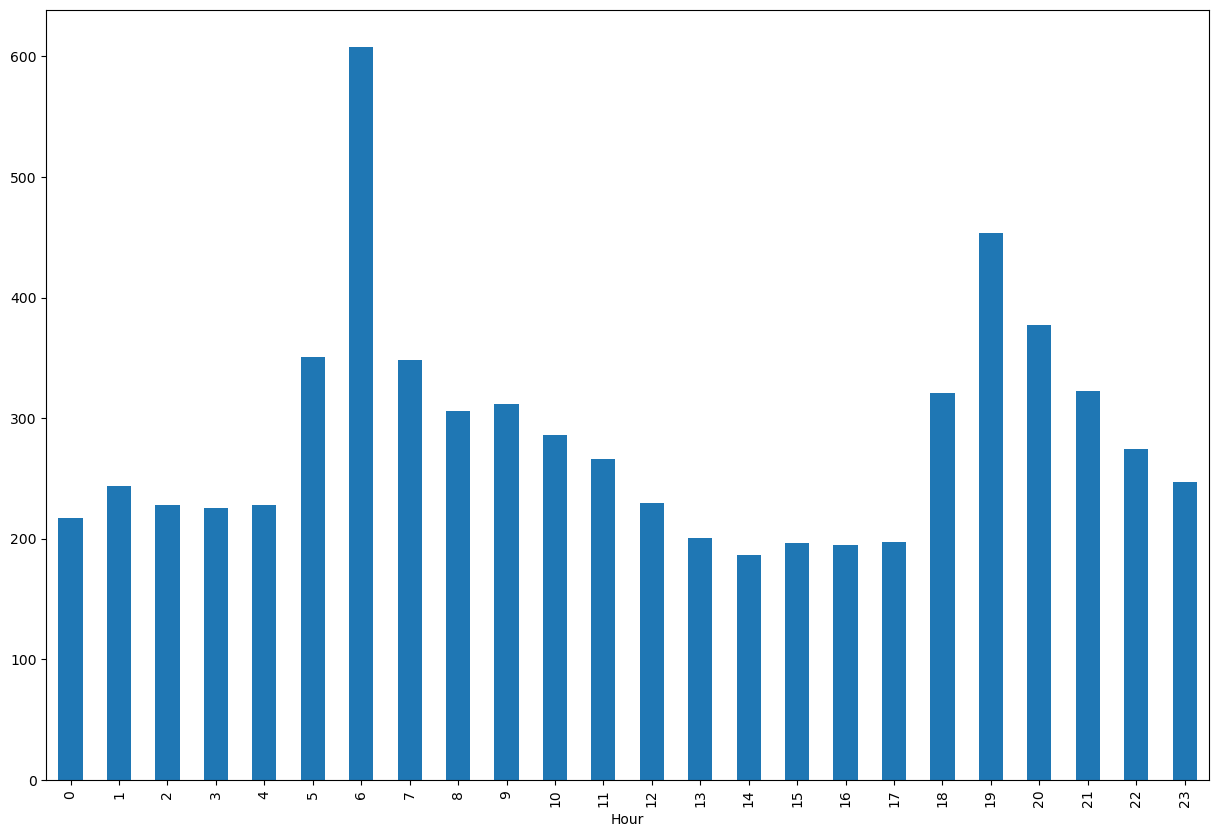

In [55]:
plt.figure(figsize=(15, 10))
df_desagregado.groupby("Hour")["Medidor [W]"].mean().plot(kind="bar")
plt.show()

In [65]:
df_desagregado.head(1)

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system,Month,Day,Hour,Minutes,Date,WeekDay,WeekDayNumber
0,2017-06-07,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1,6,7,0,0,2017-06-07,Wednesday,2


In [63]:
pd.cut(df_desagregado["Hour"], [0, 9, 12, 18, 21, 23], labels=["No pico", "Pico", "No pico", "Pico", "No pico"],ordered=False).

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
194118    No pico
194119    No pico
194120    No pico
194121    No pico
194122    No pico
Name: Hour, Length: 194123, dtype: category
Categories (2, object): ['No pico', 'Pico']


In [56]:
plt.figure(figsize=(15, 10))
agg = df_desagregado.groupby("Hour")["Medidor [W]"].mean()
# agg[agg["Hour"] < 7].plot(kind="bar")
plt.show()

KeyError: 'Hour'

<Figure size 1500x1000 with 0 Axes>

## Visualización por electrodomesticos

In [39]:
electrics = df_cargas.drop(["Fecha", "Medidor [W]", "Month", "Day", "Minutes", "Hour", "Date", "WeekDay", "WeekDayNumber"], axis=1).columns.to_list()
electrics

['Refrigerator',
 'Clothes washer',
 'Clothes Iron',
 'Computer',
 'Oven',
 'Play',
 'TV',
 'Sound system']

c:\Users\JUAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

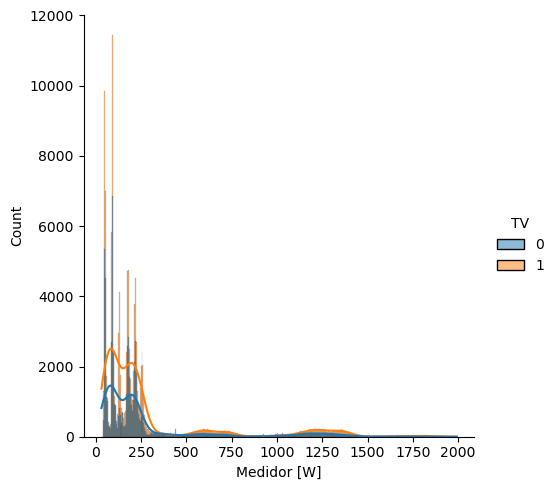

In [50]:
plt.figure(figsize=(15, 10))
sns.displot(df_cargas, x="Medidor [W]", hue="TV", kde=True)
plt.show()

## Reportes

In [48]:
# ProfileReport(df_desagregado).to_file("../reports/desagregado_report")
# ProfileReport(df_cargas).to_file("../reports/cargas_report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\JUAN\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:375: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\JUAN\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:375: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
df_cargas.drop(["Month", "Day", "Hour", "Minutes", "Date", "WeekDay", "WeekDayNumber"], axis=1).to_json("../data/transformed/matriz_carga.json")